<a href="https://colab.research.google.com/github/SIDDH4RTH245/data-science-daily-journey/blob/main/machine-learning/model-comparison/titanic-model-comparison/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [5]:
df = pd.read_csv("/Titanic-Dataset.csv")

df = df.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1)

df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

df = pd.get_dummies(df, drop_first=True)

df.head()


/tmp/ipython-input-3152010534.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-3152010534.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [6]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

print("Logistic Regression Accuracy:", log_accuracy)


Logistic Regression Accuracy: 0.8100558659217877


In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.8212290502793296


In [9]:
log_cv = cross_val_score(log_model, X, y, cv=5)
rf_cv = cross_val_score(rf_model, X, y, cv=5)

print("Logistic CV Mean:", log_cv.mean())
print("Random Forest CV Mean:", rf_cv.mean())


Logistic CV Mean: 0.7912497646098802
Random Forest CV Mean: 0.813709120582512


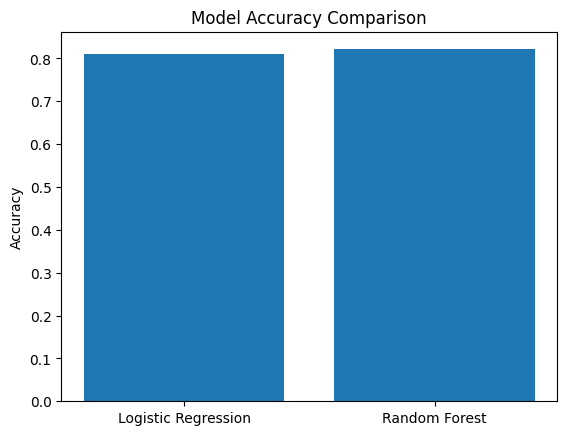

In [10]:
models = ["Logistic Regression", "Random Forest"]
accuracies = [log_accuracy, rf_accuracy]

plt.bar(models, accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


## Key Insights

- Random Forest typically performs better than Logistic Regression.
- Cross-validation gives more reliable performance estimation.
- Ensemble methods often outperform linear models.
